<a href="https://colab.research.google.com/github/FernandesAA/CAP-417/blob/main/HandsOn2/Exhaustive_search_TEMPERATURE_local_versus_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Inverse Problem**
Given a set of pairs of numbers, what is the value of *a* and *b* in y=a*x + b?
Applied to a set of temperatures, taken hourly, you can see a line approximately intercepting the mean value. This is the best choice for a linear model over a set of hourly temperatures, demonstrated by exhaustive search and the linear model.


*Cost/Loss Function*

For use as cost/loss functions, this example of real data is interesting, where a linear regression does not represent the data as it really is and the average error is small. Even the Absolute Error is low and close to the harmonic regression; however, the Mean Squared Error, presents much more discrepant values:

* Mean absolute error linear: 4.767179
* Mean absolute error harmonic: 2.363139

* Linear RMSE: 106.50539412
* Harmonic RMSE: RMSE 0.0000005

Evidencing outliers.

In [ ]:
install.packages ("cowplot")
install.packages ("tidyverse")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



New names:
* `` -> ...20

Rows: 456 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): Data, Hora (UTC)
dbl (17): Temp. Ins. (C), Temp. Max. (C), Temp. Min. (C), Umi. Ins. (%), Umi...
lgl  (1): ...20

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Data,Temp
<dttm>,<dbl>
2022-03-01 00:00:00,22.4
2022-03-01 01:00:00,21.9
2022-03-01 02:00:00,21.5
2022-03-01 03:00:00,22.2
2022-03-01 04:00:00,23.2
2022-03-01 05:00:00,21.9


[1] "BEST:"

[1] "Exhaustive Search:  a=0.0000005,  b=26.8500005,  RMSE=0.46485012"

[1] "Mean value aprox.:  a=0.0000005,  b=26.8719385,  RMSE=0.00000012"

[1] "Linear Regression:  a=0.0013095,  b=26.5773575,  RMSE=106.50539412"

[1] "Harmonic Regression:  RMSE 0.0000005"


Call:
lm(formula = df2$Temp ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-8.410 -4.694 -1.719  5.330  9.799 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.577357   0.502027  52.940   <2e-16 ***
x            0.001309   0.001933   0.677    0.499    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.31 on 447 degrees of freedom
Multiple R-squared:  0.001025,	Adjusted R-squared:  -0.00121 
F-statistic: 0.4586 on 1 and 447 DF,  p-value: 0.4986



Call:
lm(formula = df2$Temp ~ x + sin(2 * pi/365 * x) - +cos(2 * pi/365 * 
    x) + sin(30 * pi/(365) * x) + cos(30 * pi/(365) * x))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2659 -1.7043  0.3787  1.7783  8.1872 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            26.611238   0.305782  87.027   <2e-16 ***
x                       0.001471   0.001162   1.266    0.206    
sin(2 * pi/365 * x)     0.016541   0.217378   0.076    0.939    
sin(30 * pi/(365) * x) -4.120027   0.204358 -20.161   <2e-16 ***
cos(30 * pi/(365) * x) -4.539682   0.204812 -22.165   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.065 on 444 degrees of freedom
Multiple R-squared:  0.6695,	Adjusted R-squared:  0.6665 
F-statistic: 224.8 on 4 and 444 DF,  p-value: < 2.2e-16


[1] "Mean absolute error linear: 4.767179"

[1] "Mean absolute error harmonic: 2.363139"

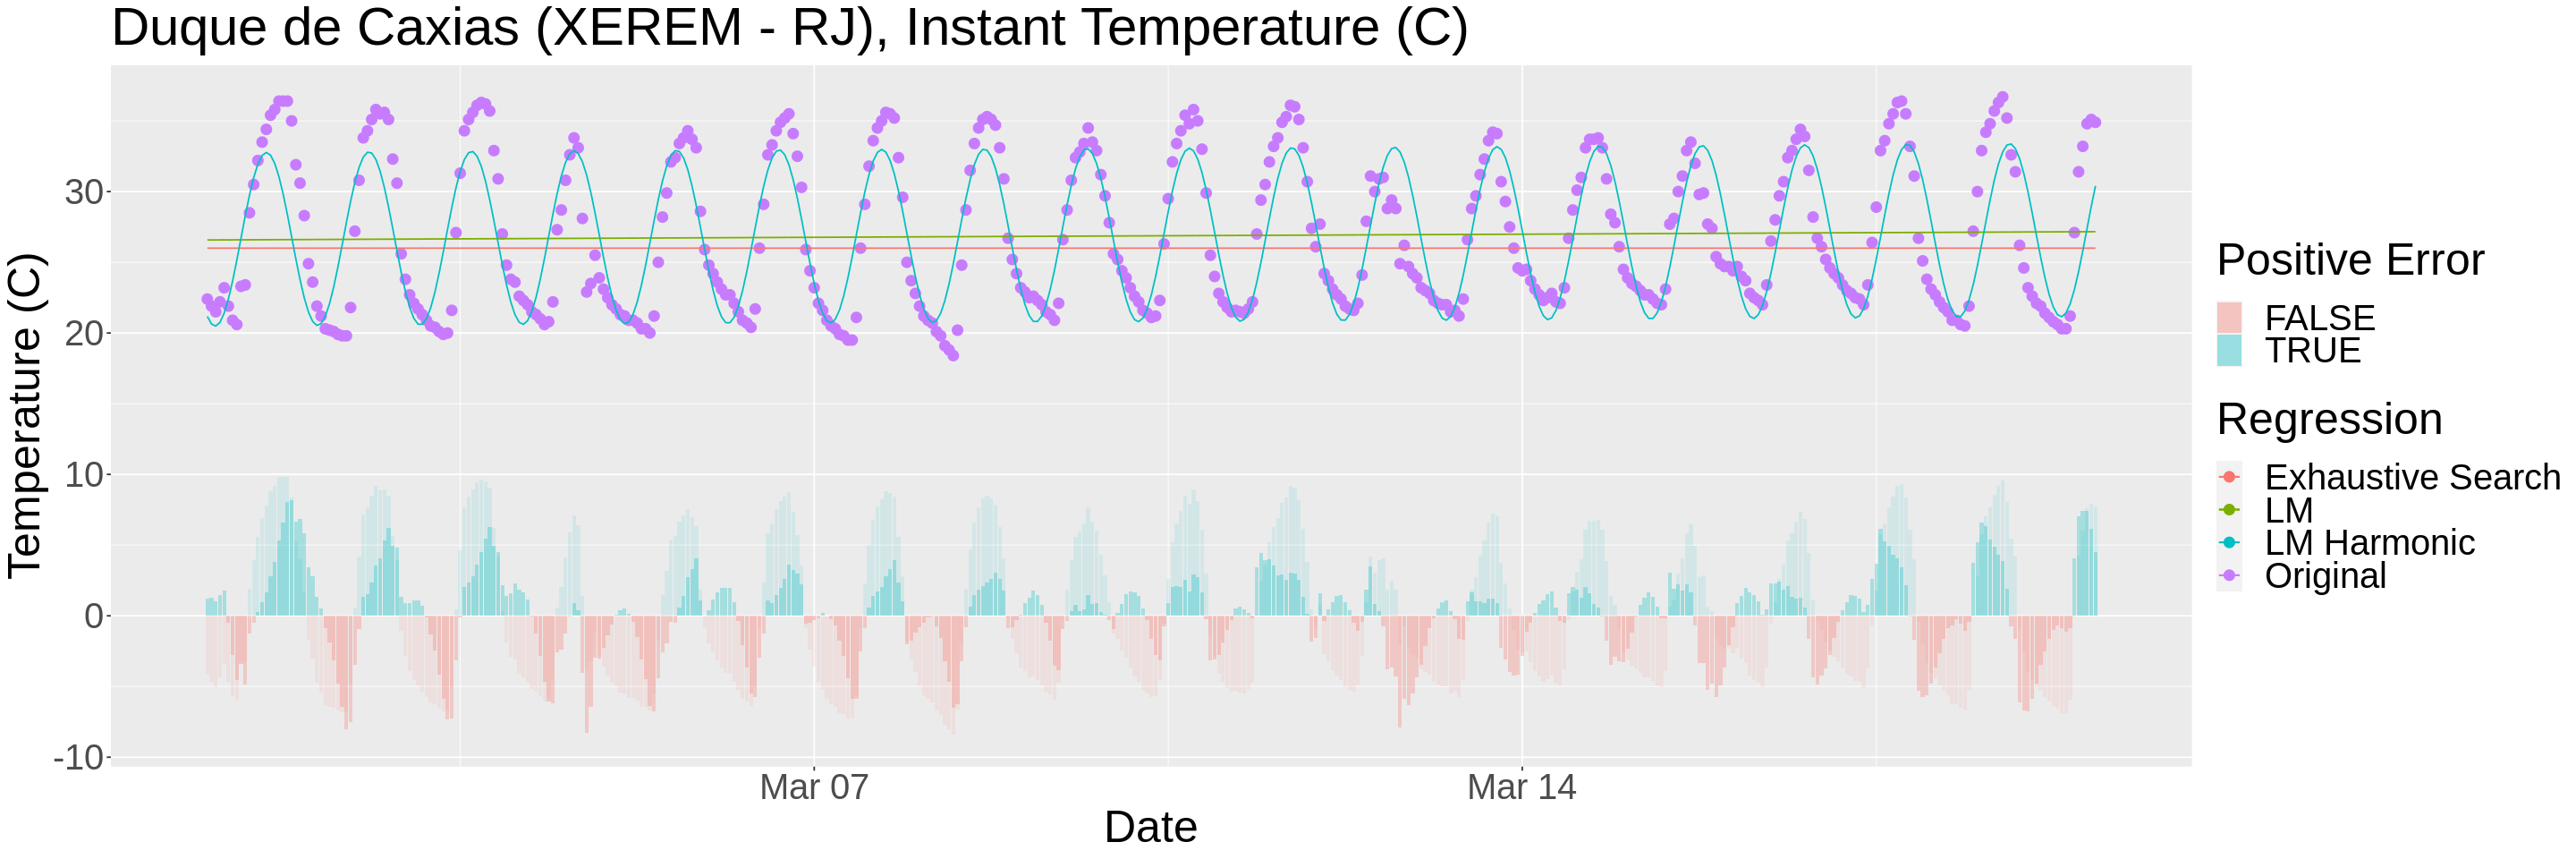

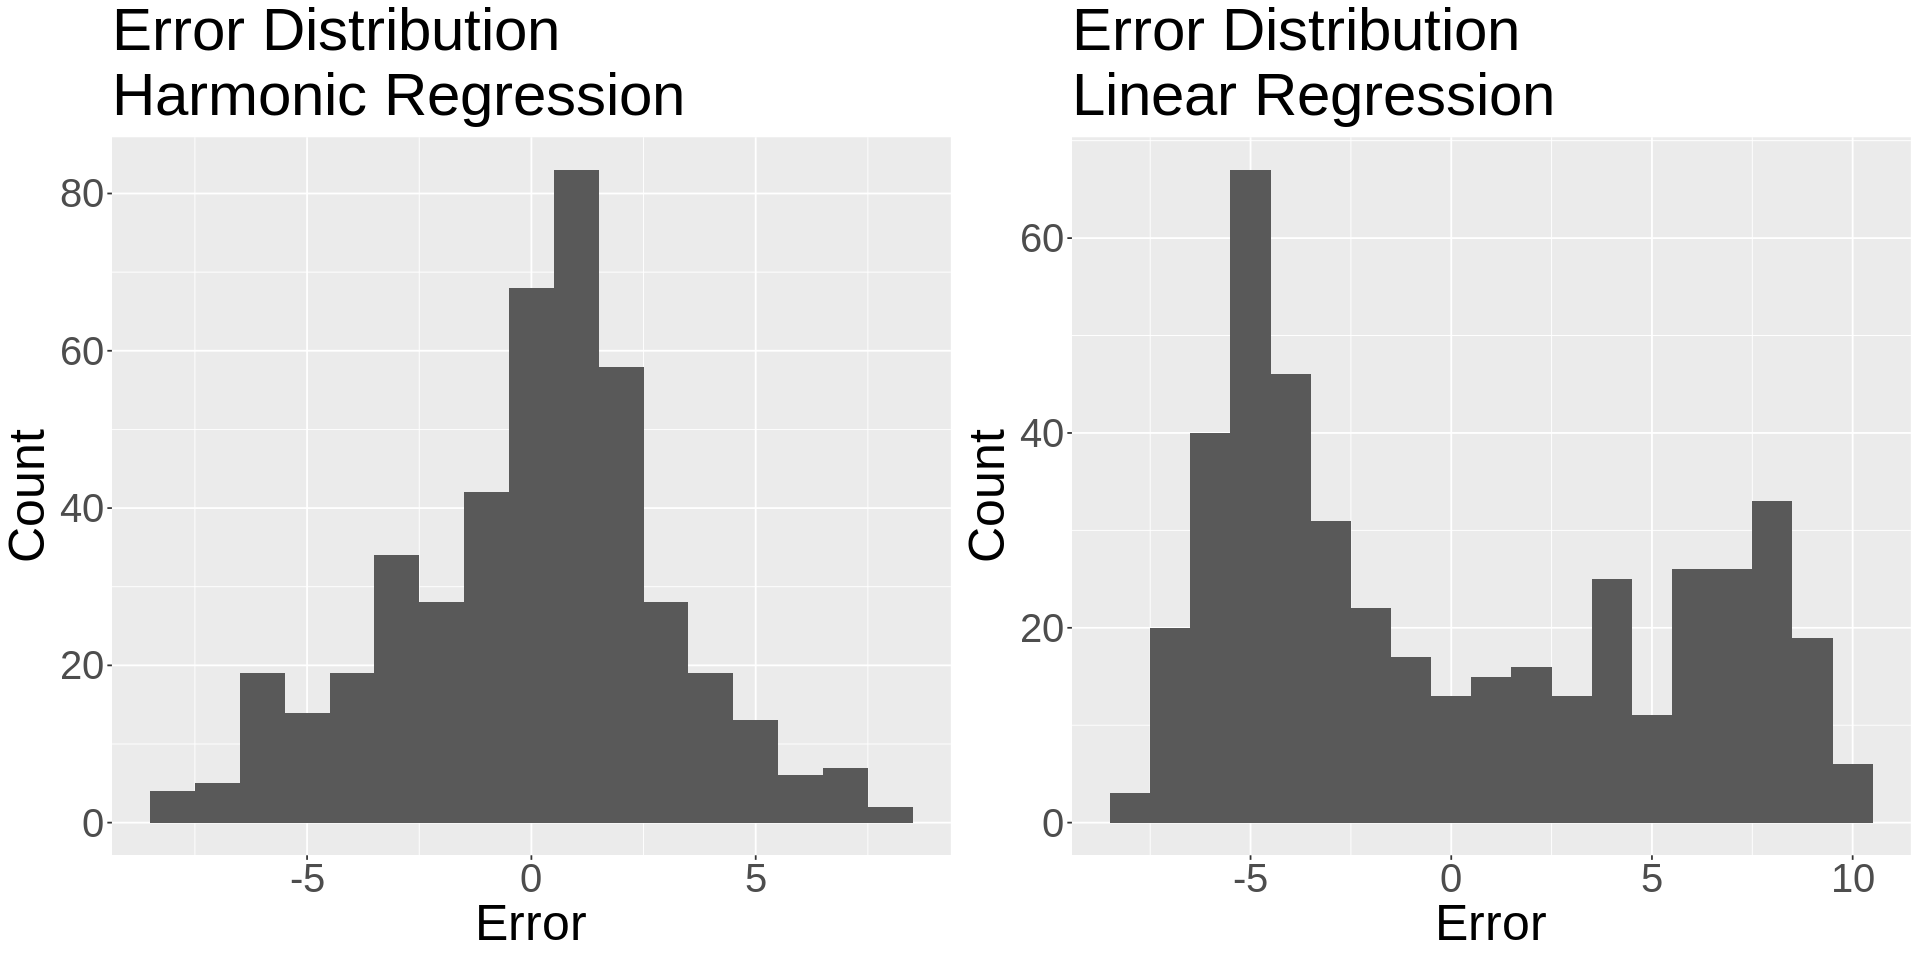

In [ ]:
library (ggplot2)
library (tidyverse)
library (cowplot)

f <- function (a, b, x) {
  return (a *x + b)
}

blind_search <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  for (a in seq (a1, a2, 0.01)){
    for (b in seq (b1, b2, 0.05)) {
      y <- f(a, b, x)
      rmse <- sqrt(sum(Temp - y)^2/length(y))
      if (rmse < rtemp) {
        rtemp <- rmse
        best <- c(a, b, "rmse = ", rmse)
      }
#      print (c(a, b, "rmse = ", rmse))
    }
  }
  return (best)
}


df <- read_delim (file = "/home/Dados/DUQUE DE CAXIAS - XEREM (A603).csv", delim = ";")

df$Data <- as.POSIXct(paste(df$Data, df$`Hora (UTC)`), format = "%d/%m/%Y%H%M")

df2 <- df [, c(1,3)]
df2 <- rename (df2, Temp = "Temp. Ins. (C)")
df2 <- df2[complete.cases(df2),]
head(df2)


a <- 0
b <- mean (df2$Temp)

x <- 1:length(df2$Data)
y <- f(a, b, x)

err <- blind_search(df2$Temp, -1, 25, 1, 30)

yreg <- lm (df2$Temp ~x)
yharm <- lm(df2$Temp ~ x + sin(2*pi/365*x)- + cos(2*pi/365*x) +
            sin(30*pi/(365)*x) + cos(30*pi/(365)*x)) 
y_sin <- predict(yharm)

err <- blind_search(df2$Temp, -1, 25, 1, 30)

yreg <- lm (df2$Temp ~x)

saved <- options(repr.plot.width=24, repr.plot.height=8)
ggplot () +
  geom_point(data = df2, aes(x = Data, y = Temp, color = 'Original'), size = 3) + 
  geom_line(aes(x=df2$Data, y=f(as.integer(err[1]), as.integer(err[2]), x), color = 'Exhaustive Search')) +
  geom_line(aes(x=df2$Data, y=f(coefficients(yreg)[2], coefficients(yreg)[1], x), color = 'LM')) +
  geom_line(aes(x=df2$Data, y=y_sin, color = 'LM Harmonic')) +
  geom_col (aes(x=df2$Data, y=df2$Temp-y_sin, fill=df2$Temp-y_sin > 0), alpha =0.3) +
  geom_col (aes(x=df2$Data, y=df2$Temp-ylm, fill=df2$Temp-ylm > 0), alpha =0.1) +
  #  geom_line(aes(x=df2$Data, y= yreg$residuals)) +
  theme(text = element_text(size=30)) +
  xlab("Date") + ylab("Temperature (C)") +  labs(color = "Regression", fill = "Positive Error") +
  ggtitle ("Duque de Caxias (XEREM - RJ), Instant Temperature (C)") 

options(saved)

sprintf ("BEST:")
sprintf ("Exhaustive Search:  a=%f5,  b=%f5,  RMSE=%f12", as.double(err[1]), as.double(err[2]), as.double(err[4]))
sprintf ("Mean value aprox.:  a=%f5,  b=%f5,  RMSE=%f12", 0, mean(df2$Temp), sqrt(sum(df2$Temp - mean(df2$Temp))^2/length(df2$Temp)))

ylm <- f(coefficients(yreg)[2], coefficients(yreg)[1], x)
sprintf ("Linear Regression:  a=%f5,  b=%f5,  RMSE=%f12", coefficients(yreg)[2], coefficients(yreg)[1], sqrt(sum(df2$Temp - mean(ylm)^2/length(df2$Temp))))
sprintf ("Harmonic Regression:  RMSE %f5", sqrt(sum(df2$Temp - mean(y_sin))^2/length(df2$Temp)))
summary (yreg)
summary(yharm)

sprintf ("Mean absolute error linear: %f", mean(abs(df2$Temp - ylm)))
sprintf ("Mean absolute error harmonic: %f", mean(abs(df2$Temp - y_sin)))

p1 <- ggplot () +
  geom_histogram (aes(df2$Temp-y_sin), binwidth = 1) +
  theme(text = element_text(size=30)) +
  xlab("Error") + ylab("Count") +  labs(color = "Regression", fill = "Positive Error") +
  ggtitle ("Error Distribution \nHarmonic Regression") 

p2 <- ggplot () +
  geom_histogram (aes(df2$Temp-ylm), binwidth = 1) +
  theme(text = element_text(size=30)) + 
  xlab("Error") + ylab("Count") +  labs(color = "Regression", fill = "Positive Error") +
  ggtitle ("Error Distribution\nLinear Regression") 

saved <- options(repr.plot.width=16, repr.plot.height=8)
plot_grid(p1, p2)
options(saved)

# **2.1. Problems when Observing the Local versus Global**

We can see with the example below, that when doing a linear regression with part of the set, i.e. half of a day, in this case choosing part of the heating of the day, a linear regression is able to represent this part better than the whole diurnal cycle.
 

[1] "-1"               "10"               "rmse = "          "68.7912845739439"
[1] "-1"               "10.25"            "rmse = "          "67.9252591701595"
[1] "-1"              "10.5"            "rmse = "         "67.059233766375"
[1] "-1"               "10.75"            "rmse = "          "66.1932083625906"
[1] "-1"               "11"               "rmse = "          "65.3271829588061"
[1] "-1"               "11.25"            "rmse = "          "64.4611575550217"
[1] "-1"               "11.5"             "rmse = "          "63.5951321512373"
[1] "-1"               "11.75"            "rmse = "          "62.7291067474528"
[1] "-1"               "12"               "rmse = "          "61.8630813436684"
[1] "-1"              "12.25"           "rmse = "         "60.997055939884"
[1] "-1"               "12.5"             "rmse = "          "60.1310305360995"
[1] "-1"               "12.75"            "rmse = "          "59.2650051323151"
[1] "-1"               "13"               "rmse 

[1] "BEST:"

[1] "Exhaustive Search:  a=0.4000005,  b=20.7500005,  RMSE=0.02886812"

[1] "Linear Regression:  a=0.5541965,  b=19.7560615,  RMSE=0.00000012"


Call:
lm(formula = df3$Temp ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5896 -1.5574  0.1543  1.2991  4.0936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.7561     1.4716  13.425 1.01e-07 ***
x             0.5542     0.1999   2.772   0.0197 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.391 on 10 degrees of freedom
Multiple R-squared:  0.4345,	Adjusted R-squared:  0.3779 
F-statistic: 7.682 on 1 and 10 DF,  p-value: 0.01973


[1] 1.716667

[1] 1.808023

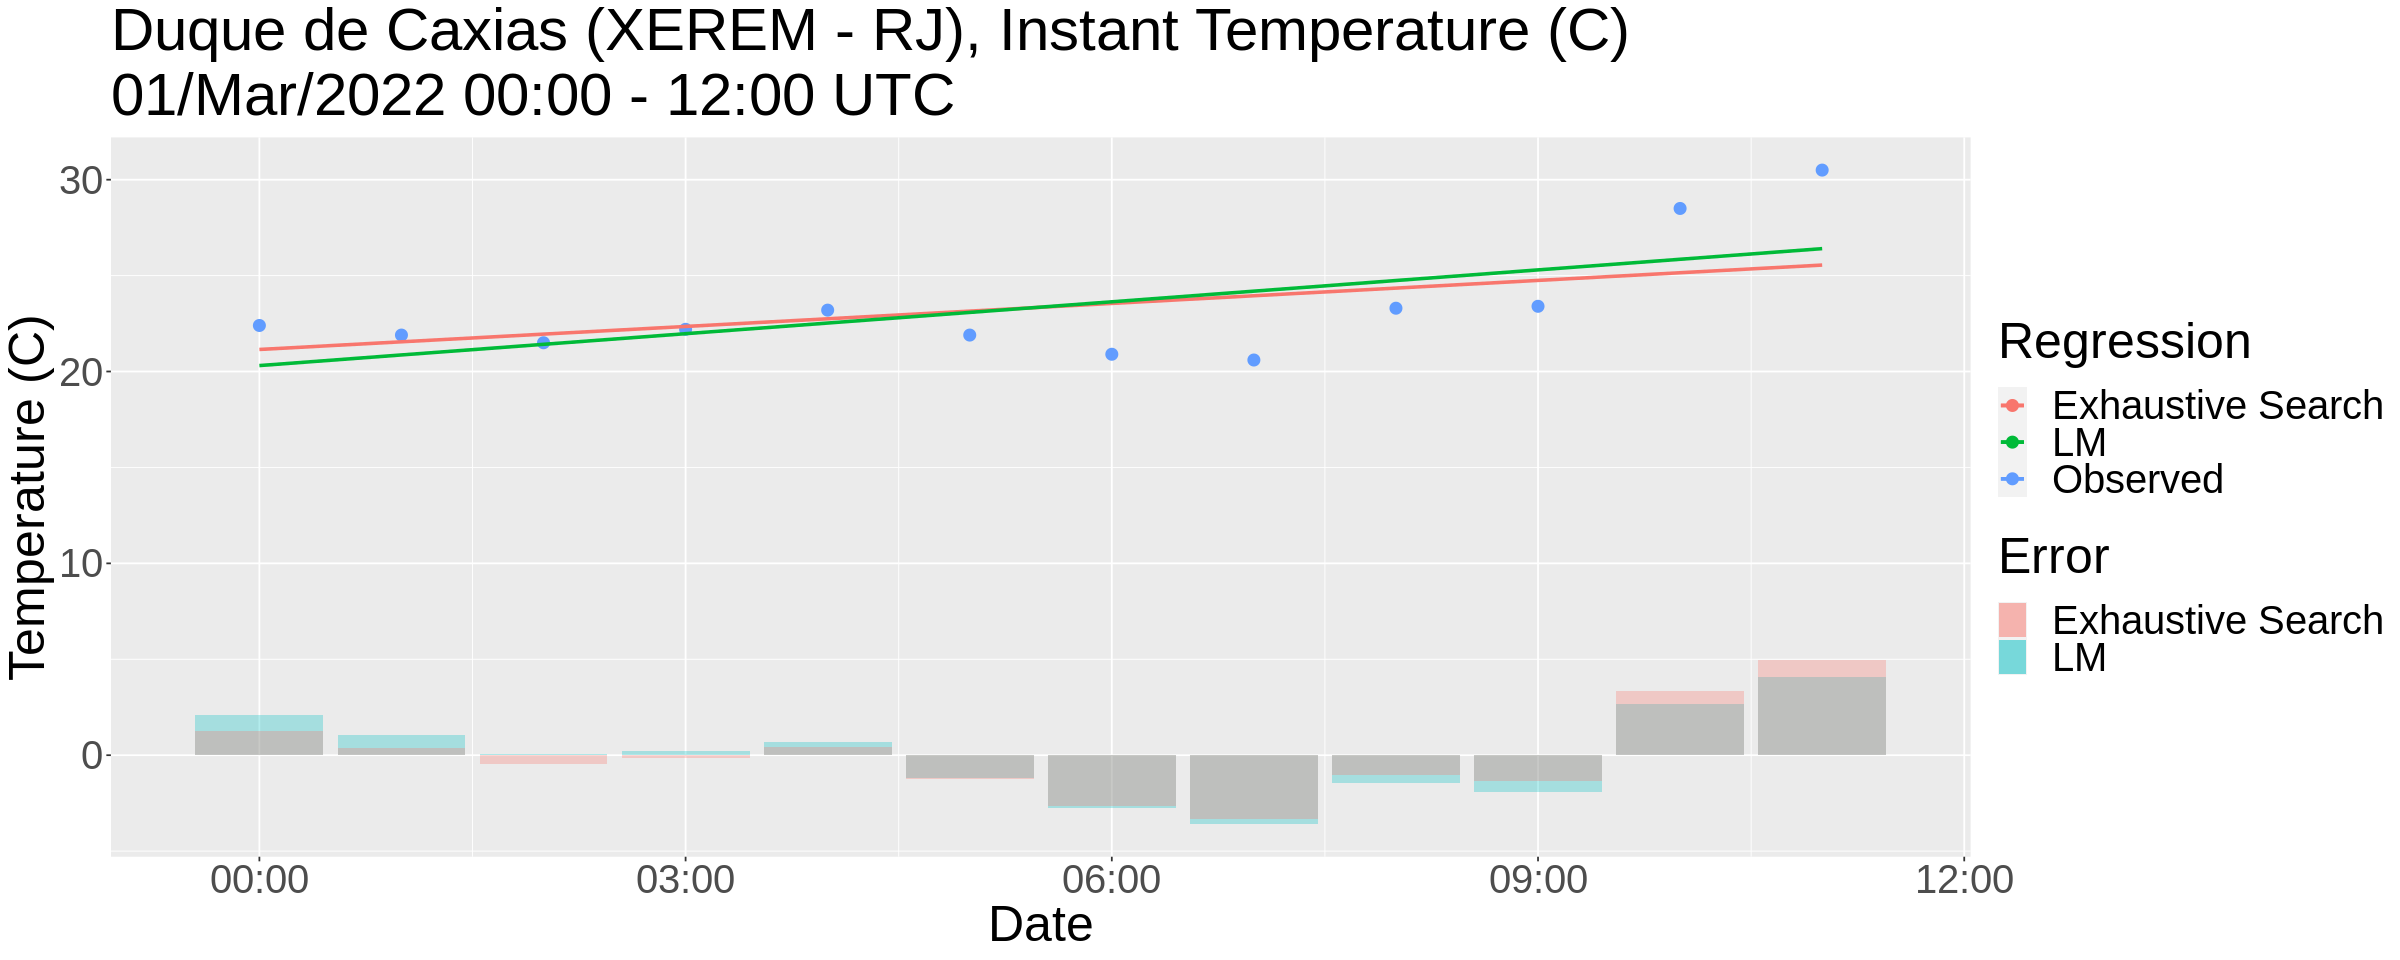

In [ ]:

blind_search <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  for (a in seq (a1, a2, 0.05)){
    for (b in seq (b1, b2, 0.25)) {
      y <- f(a, b, x)
      rmse <- sqrt(sum(Temp - y)^2/length(y))
      if (rmse < rtemp) {
        rtemp <- rmse
        best <- c(a, b, "rmse = ", rmse)
      }
      print (c(a, b, "rmse = ", rmse))
    }
  }
  return (best)
}

df3 <- df2[df2$Data < "2022-03-01 12:00",]
x <- 1:length(df3$Data)
y <- f(a, b, x)

err <- blind_search(df3$Temp, -1, 10, 1, 30)
y_new <- f(as.double(err[1]), as.double(err[2]), x)

yreg <- lm (df3$Temp ~ x )
y_lm <- f(coefficients(yreg)[2], coefficients(yreg)[1], x)

y_new_Res <- df3$Temp - y_new

saved <- options(repr.plot.width=20, repr.plot.height=8)
ggplot () +
  geom_point(data = df3, aes(x = Data, y = Temp, color = 'Observed'), size = 3) + 
  geom_line(aes(x=df3$Data, y=y_new, color = 'Exhaustive Search'), lwd = 1) +
  geom_line(aes(x=df3$Data, y=y_lm, color = 'LM'), lwd = 1) +
  geom_col(aes(x=df3$Data, y= yreg$residuals, fill = 'LM'), alpha = 0.3) +
  geom_col(aes(x=df3$Data, y= y_new_Res, fill = 'Exhaustive Search'), alpha=0.3) +
  theme(text = element_text(size=30)) +
  xlab("Date") + ylab("Temperature (C)") +  labs(color = "Regression") +  labs(fill = "Error") +
  ggtitle ("Duque de Caxias (XEREM - RJ), Instant Temperature (C)\n01/Mar/2022 00:00 - 12:00 UTC") 

options(saved)

sprintf ("BEST:")
sprintf ("Exhaustive Search:  a=%f5,  b=%f5,  RMSE=%f12", as.double(err[1]), as.double(err[2]), as.double(err[4]))
sprintf ("Linear Regression:  a=%f5,  b=%f5,  RMSE=%f12", coefficients(yreg)[2], coefficients(yreg)[1], sqrt(sum(df3$Temp - mean(y_lm))^2/length(df3$Temp)))
summary (yreg)
mean(abs(df3$Temp-y_new))
mean(abs(df3$Temp-y_lm))